In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv("diabetes.csv")

Data_copy = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data_profile = pandas_profiling.ProfileReport(data)
#data_profile

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# EDA

data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:

# As we can see, for some columns, the values is 0 and that doesnt make any sense. 
# So we will consider 0 as a misiing value for the below columns

#     Glucose
#     BloodPressure
#     SkinThickness
#     Insulin
#     BMI


In [10]:
missing_data = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]

In [11]:
missing_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [12]:
missing_data = missing_data.replace(0,np.NaN)

In [13]:
missing_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [14]:
# Now lets handle the missing Data

Text(0.5, 1.0, 'Glucose Distribution')

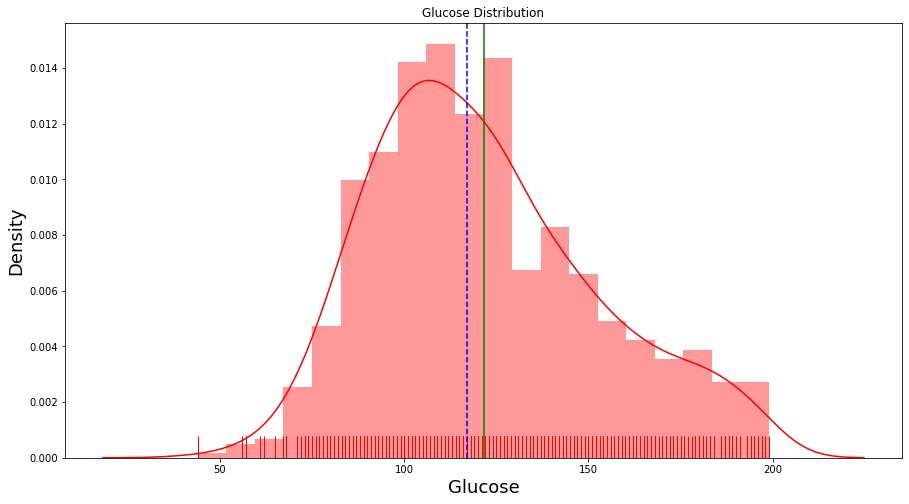

In [15]:
# Glucose
plt.figure(figsize=(15,8))

sns.distplot(missing_data.Glucose,bins=20,rug=True,color="Red")
plt.axvline(missing_data.Glucose.mean(),color="green")
plt.axvline(missing_data.Glucose.median(),color="Blue",linestyle="--")
plt.xlabel("Glucose",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Glucose Distribution")

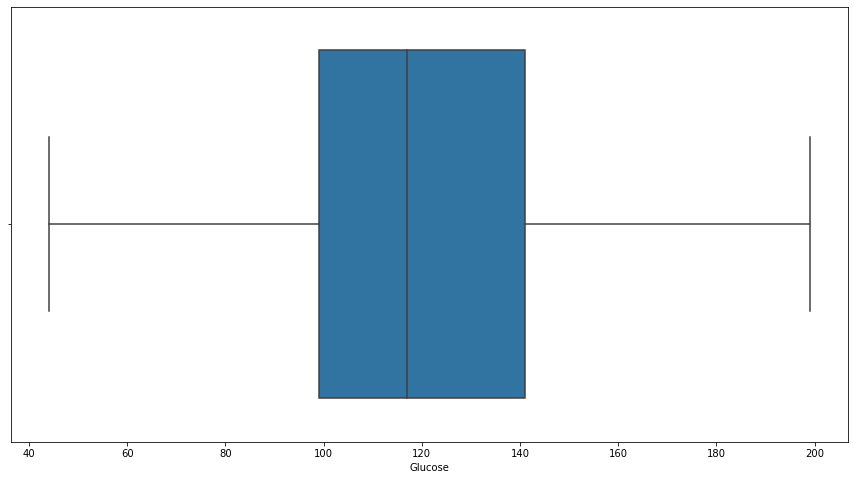

In [16]:
plt.figure(figsize=(15,8))

sns.boxplot(missing_data.Glucose)

In [17]:
# Blood Pressure

Text(0.5, 1.0, 'Blood Pressure Distribution')

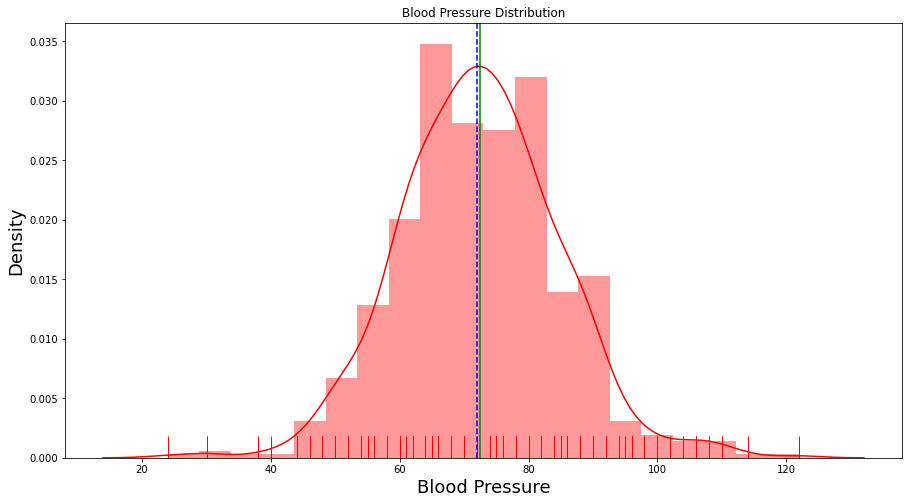

In [18]:
# Glucose
plt.figure(figsize=(15,8))

sns.distplot(missing_data.BloodPressure,bins=20,rug=True,color="Red")
plt.axvline(missing_data.BloodPressure.mean(),color="green")
plt.axvline(missing_data.BloodPressure.median(),color="Blue",linestyle="--")
plt.xlabel("Blood Pressure",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Blood Pressure Distribution")

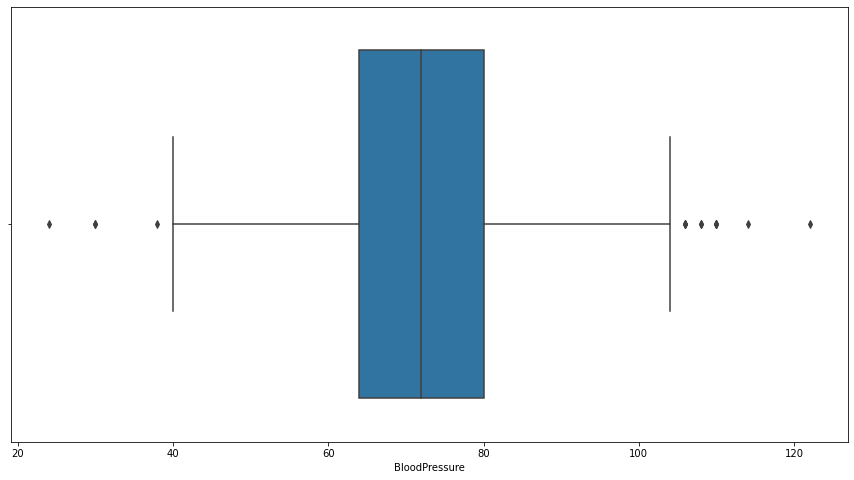

In [19]:
plt.figure(figsize=(15,8))

sns.boxplot(missing_data.BloodPressure)

In [20]:
# Skin Thickness

Text(0.5, 1.0, 'Skin Thickness Distribution')

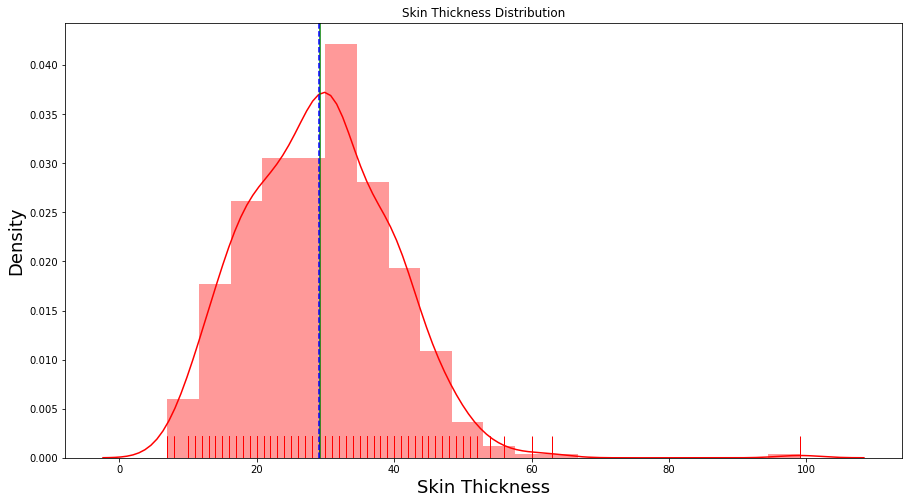

In [21]:

plt.figure(figsize=(15,8))

sns.distplot(missing_data.SkinThickness,bins=20,rug=True,color="Red")
plt.axvline(missing_data.SkinThickness.mean(),color="green")
plt.axvline(missing_data.SkinThickness.median(),color="Blue",linestyle="--")
plt.xlabel("Skin Thickness",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Skin Thickness Distribution")

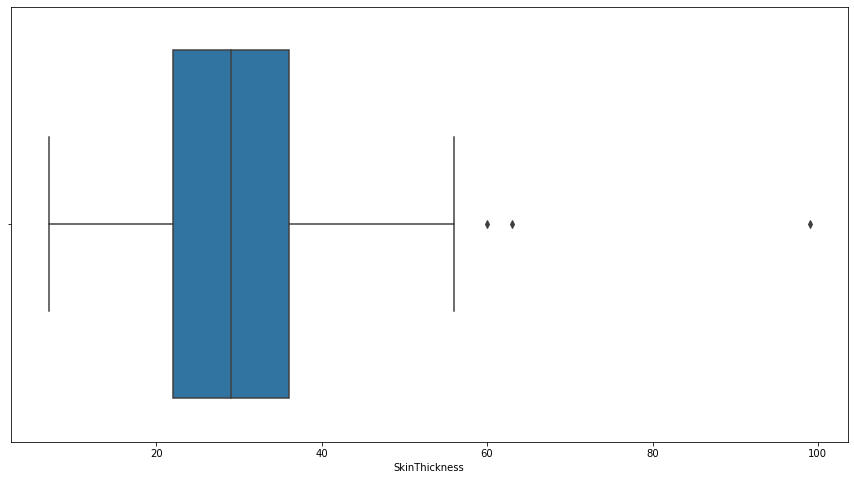

In [22]:
plt.figure(figsize=(15,8))

sns.boxplot(missing_data.SkinThickness)

In [23]:
# Insuline

Text(0.5, 1.0, 'Insuline Distribution')

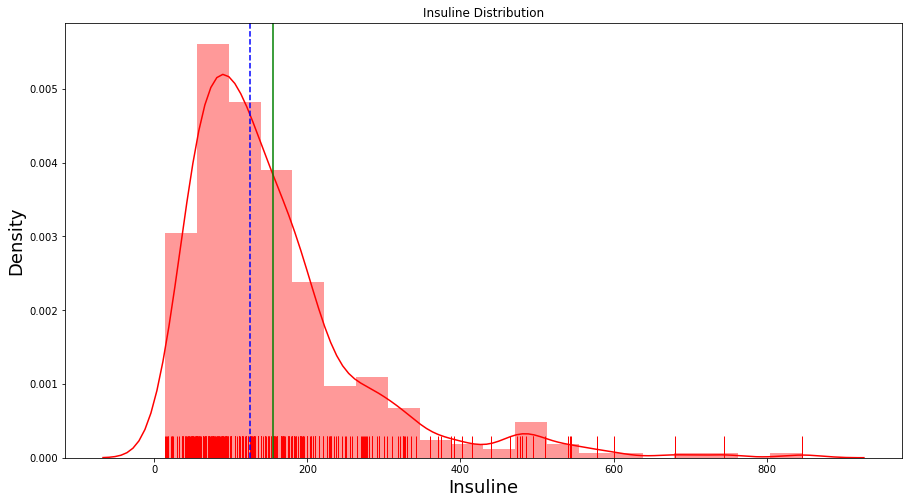

In [24]:

plt.figure(figsize=(15,8))

sns.distplot(missing_data.Insulin,bins=20,rug=True,color="Red")
plt.axvline(missing_data.Insulin.mean(),color="green")
plt.axvline(missing_data.Insulin.median(),color="Blue",linestyle="--")
plt.xlabel("Insuline",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Insuline Distribution")

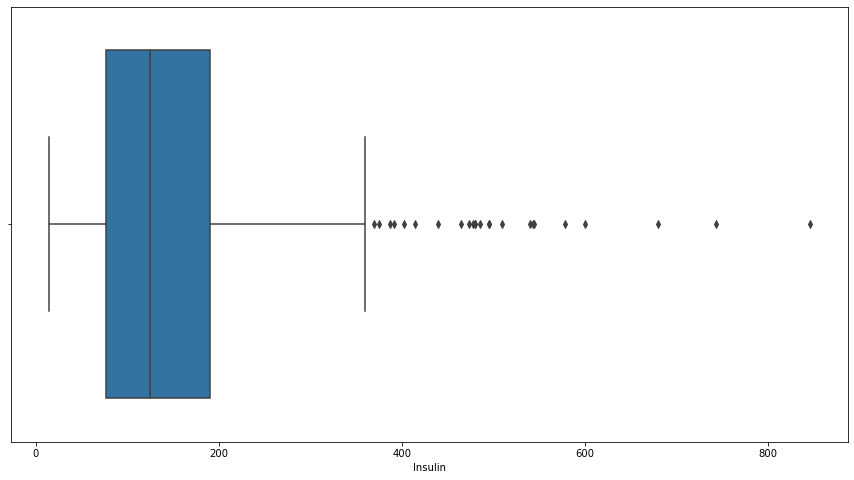

In [25]:
plt.figure(figsize=(15,8))

sns.boxplot(missing_data.Insulin)

In [26]:
# BMI

Text(0.5, 1.0, 'BMI Distribution')

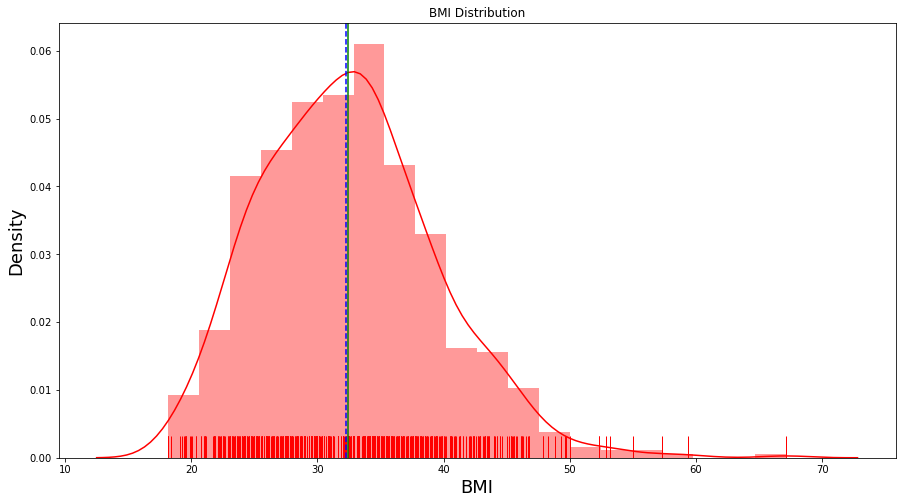

In [27]:

plt.figure(figsize=(15,8))

sns.distplot(missing_data.BMI,bins=20,rug=True,color="Red")
plt.axvline(missing_data.BMI.mean(),color="green")
plt.axvline(missing_data.BMI.median(),color="Blue",linestyle="--")
plt.xlabel("BMI",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("BMI Distribution")

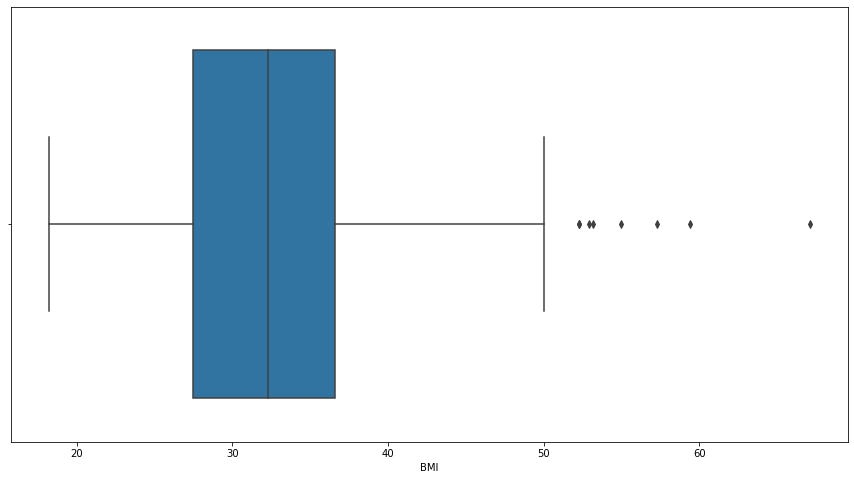

In [28]:
plt.figure(figsize=(15,8))

sns.boxplot(missing_data.BMI)

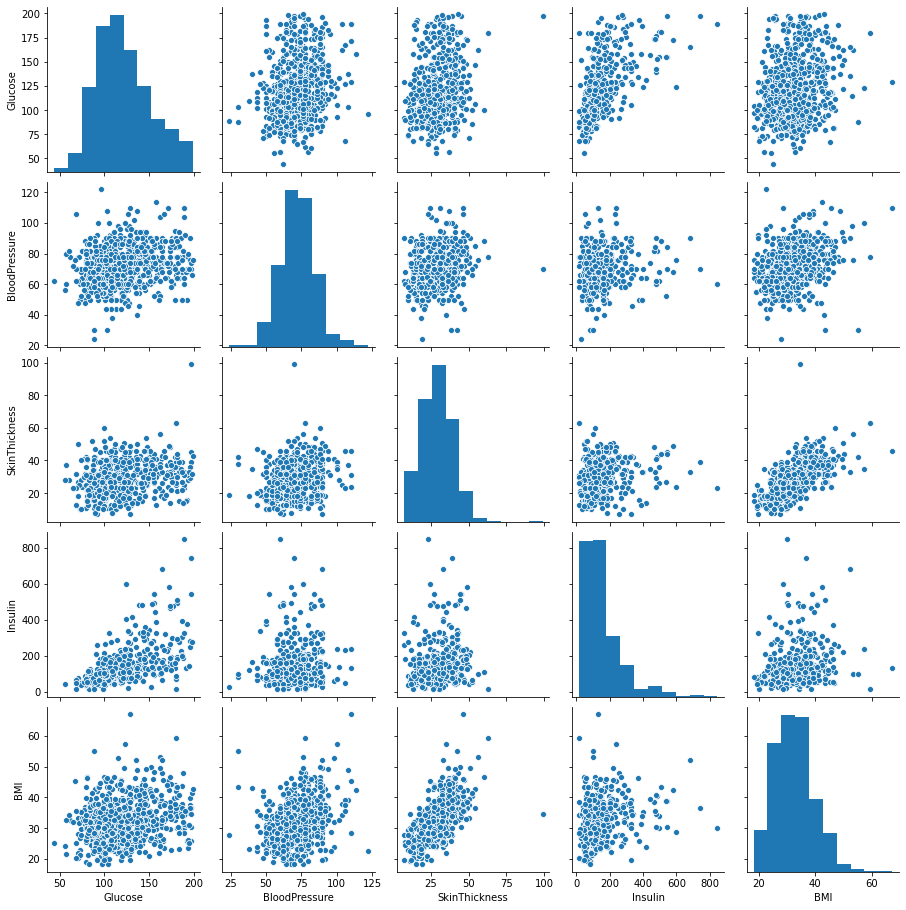

In [29]:
# Pair Plot for Missing Data
sns.pairplot(missing_data)

In [30]:
# Filling the Missing Data

In [31]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] =data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [32]:
data["Glucose"].fillna(data["Glucose"].median(),inplace=True)
data["BloodPressure"].fillna(data["BloodPressure"].mean(),inplace=True)
data["SkinThickness"].fillna(data["SkinThickness"].mean(),inplace=True)
data["Insulin"].fillna(data["Insulin"].mean(),inplace=True)
data["BMI"].fillna(data["BMI"].mean(),inplace=True)

In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [34]:
# Heat Map

Text(0.5, 1.0, 'Heat map of Original Data')

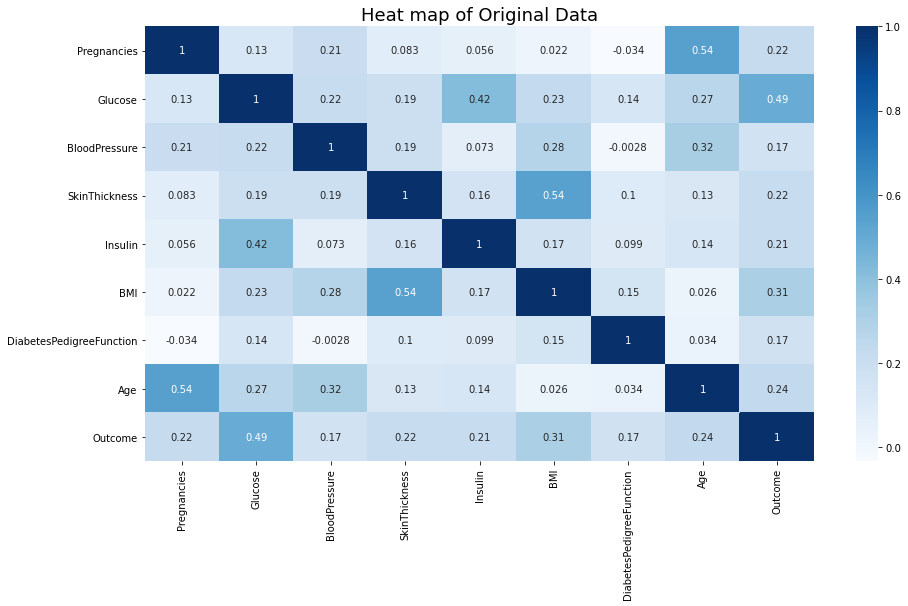

In [35]:
# Clean Data
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.title("Heat map of Original Data",fontsize=18)

Text(0.5, 1.0, 'Heat map of CLean Data')

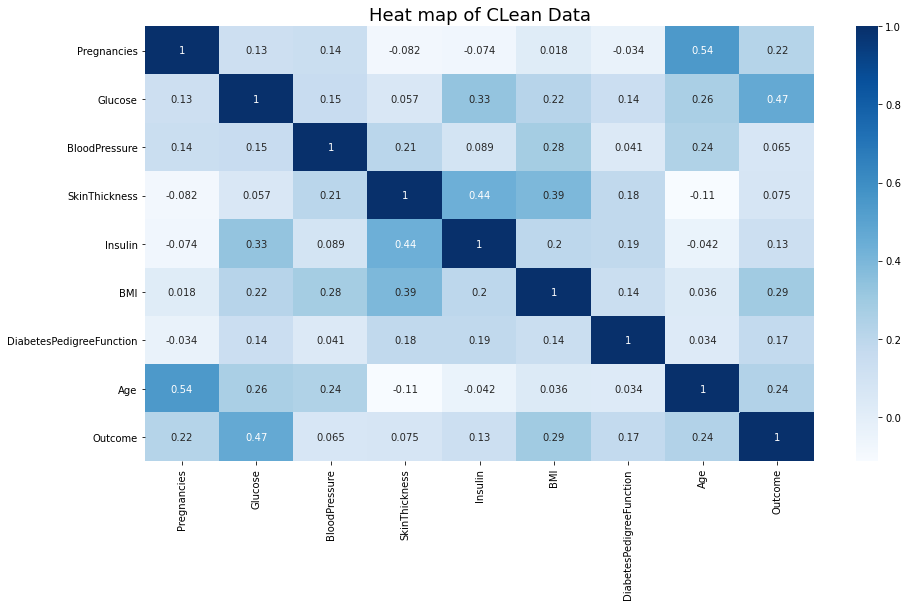

In [36]:
# Clean Data
plt.figure(figsize=(15,8))

sns.heatmap(Data_copy.corr(),annot=True,cmap="Blues")
plt.title("Heat map of CLean Data",fontsize=18)

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [39]:
# Train Test Split and Fitting the Data 

In [43]:
X = data.drop("Outcome",axis=1)
Y = data["Outcome"]

In [50]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101,stratify=Y)

In [59]:
# K Nearest Neighbour

# Checking for the best value of K

In [120]:
train_score = []
test_score = []

for i in range(1,50):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

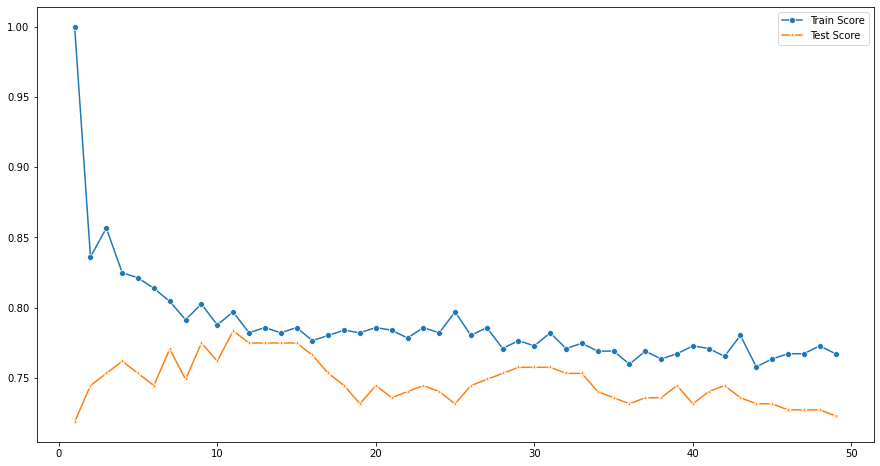

In [110]:
plt.figure(figsize=(15,8))

sns.lineplot(range(1,50),train_score,marker="o",label="Train Score")
sns.lineplot(range(1,50),test_score,marker="*",label="Test Score")

In [65]:
# We will select K=11

In [67]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [71]:
prediction_on_train = knn.predict(x_train)
prediction_on_test = knn.predict(x_test)

In [74]:
print("Train Accuracy : {}".format(accuracy_score(y_train,prediction_on_train)))
print("Test Accuracy : {}".format(accuracy_score(y_test,prediction_on_test)))

Train Accuracy : 0.7970204841713222
Test Accuracy : 0.7835497835497836


In [75]:
# Plotting Decision Region

In [80]:
from mlxtend.plotting import plot_decision_regions

C:\Users\pprat\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
C:\Users\pprat\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


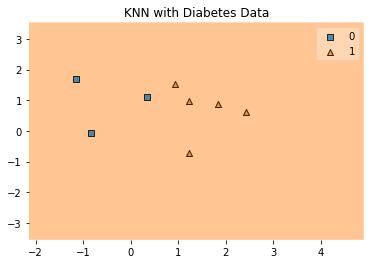

In [96]:
value = 20000
width = 20000

plot_decision_regions(X.values,Y.values,clf=knn,filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=x_test.values)
plt.title('KNN with Diabetes Data')
plt.show()

In [97]:
# Confusion matrix

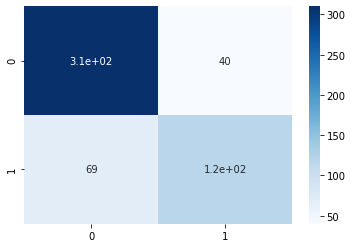

In [102]:
# Train

sns.heatmap(confusion_matrix(y_train,prediction_on_train),annot=True,cmap="Blues")

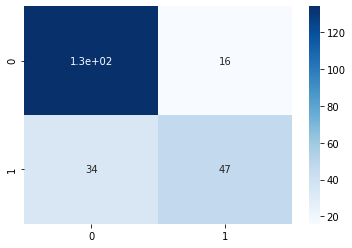

In [101]:
# Test

sns.heatmap(confusion_matrix(y_test,prediction_on_test),annot=True,cmap="Blues")

In [103]:
# Roc Curve

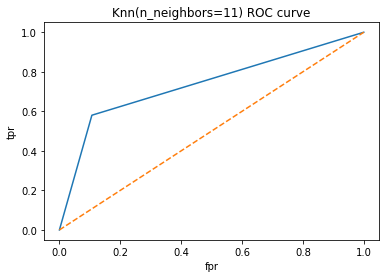

In [106]:
fpr, tpr, thr = roc_curve(y_test,prediction_on_test)
plt.plot(fpr,tpr,label="KNN Classifier")
plt.plot([0,1],[0,1],linestyle="dashed")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [112]:

from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748068924539513
Best Parameters: {'n_neighbors': 25}


In [119]:
#

data = data[(data["BloodPressure"]<110)&(data["Insulin"]<64)&(data["SkinThickness"]<80)&(data["BMI"]<60)]

In [121]:
X = data.drop("Outcome",axis=1)
Y = data["Outcome"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101,stratify=Y)



In [126]:
train_score = []
test_score = []

for i in range(1,16):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

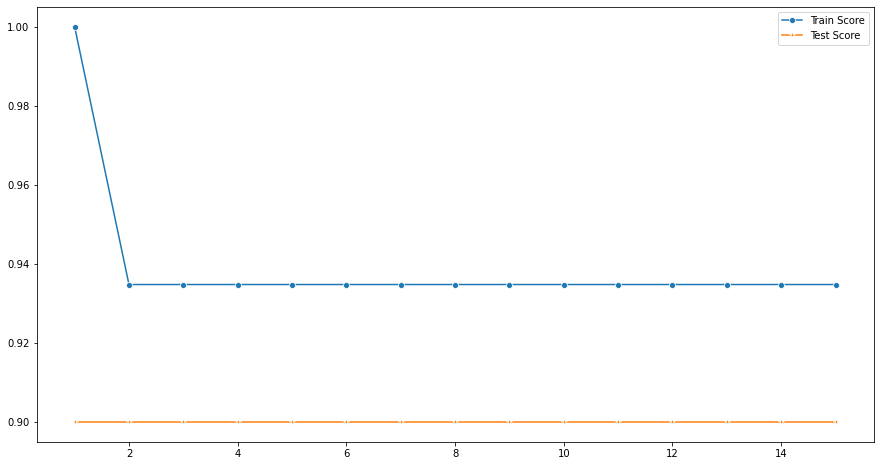

In [128]:
plt.figure(figsize=(15,8))

sns.lineplot(range(1,16),train_score,marker="o",label="Train Score")
sns.lineplot(range(1,16),test_score,marker="*",label="Test Score")

In [129]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [130]:
prediction_on_train = knn.predict(x_train)
prediction_on_test = knn.predict(x_test)

In [131]:
print("Train Accuracy : {}".format(accuracy_score(y_train,prediction_on_train)))
print("Test Accuracy : {}".format(accuracy_score(y_test,prediction_on_test)))

Train Accuracy : 0.9347826086956522
Test Accuracy : 0.9


C:\Users\pprat\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
C:\Users\pprat\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


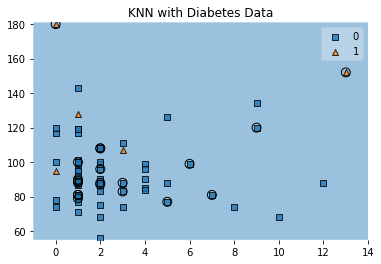

In [132]:
value = 20000
width = 20000

plot_decision_regions(X.values,Y.values,clf=knn,filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=x_test.values)
plt.title('KNN with Diabetes Data')
plt.show()